In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np

In [2]:
df = pd.read_csv('dataset_5_individ.csv', encoding='cp1251', low_memory=False)
df14 = pd.read_csv('data_15w_individ.csv', encoding='cp1251', low_memory=False)

Не дан возраст, считаем через год рождения

In [3]:
df14['age'] = df14['id_w'] - df14['i_h5']

Делим возраст на категории

In [4]:
def age_cat(x):
    if 18 <= x <= 25:
        return "18-25"
    elif 26 <= x <= 35:
        return "26-35"
    elif 36 <= x <= 45:
        return "36-45"
    elif 46 <= x <= 55:
        return "46-55"
    elif 56 <= x <= 65:
        return "56-65"
    else:
        return "66+"

In [5]:
df14['age_cat'] = df14['age'].apply(age_cat)

Считаем индекс финансовой грамотности (индекс фин. грамотности не до конца соответствует нашему индексу, так как два ключевых вопроса отсутствуют в опросе 2018 и 2020 гоад, который проводился при Минфине)

In [6]:
def t3(x):
    if x == 1:
        return 1
    else:
        return 0
def t4(x):
    if x == 2:
        return 1
    else:
        return 0
def t7(x):
    if x == 1:
        return 1
    else:
        return 0
def t8(x):
    if x == 1:
        return 1
    else:
        return 0
def t17(x):
    if x == 3:
        return 1
    else:
        return 0
def t11(x):
    if x == 1:
        return 1
    else:
        return 0

In [7]:
df14['q1'] = df14['t3'].apply(t3)
df14['q2'] = df14['t4'].apply(t4)
# T18 и T27 отсутствуют в 3 и 4 волне
df14['q5'] = df14['t7'].apply(t7)
df14['q6'] = df14['t8'].apply(t8)
df14['q7'] = df14['t17'].apply(t17)
df14['q8'] = df14['t11'].apply(t11)

df14['fingram'] = df14['q1'] + df14['q2'] + df14['q5'] + df14['q6'] + df14['q7'] + df14['q8']

In [8]:
df1 = df14[df14['id_w'] == 2013]
df2 = df14[df14['id_w'] == 2015]
df3 = df14[df14['id_w'] == 2018]
df4 = df14[df14['id_w'] == 2020]
df5 = df14[df14['id_w'] == 2022]

Исследование по годам (только 2018, 2020 и 2022 года, так как за предыдущие года индекс финансовой грамонтости рассчитать затруднительно)

<Axes: xlabel='id_w', ylabel='fingram'>

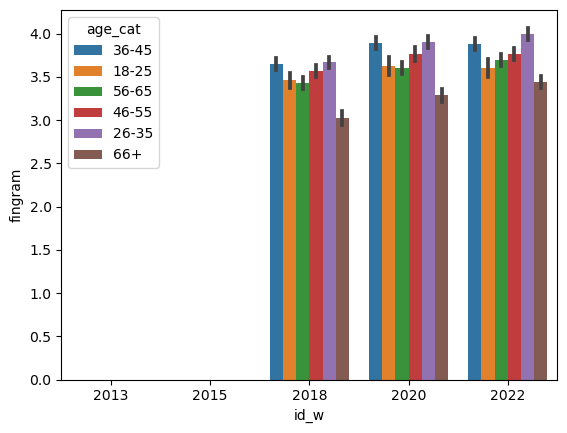

In [9]:
sns.barplot(df14, x='id_w', y='fingram', hue='age_cat')

Изучаем состав по возрасту

([<matplotlib.patches.Wedge at 0x7f89d7eb5370>,
 [Text(1.053307341100161, 0.3170861794284159, '18-25'),
  Text(0.5151973540415667, 0.9718907790428761, '26-35'),
  Text(-0.6032195519743281, 0.9198511684592736, '36-45'),
  Text(-1.090243178576914, -0.14618417002708442, '46-55'),
  Text(-0.31354742341850694, -1.0543661665985, '56-65'),
  Text(0.8869699794465504, -0.6506029938146506, '66+')])

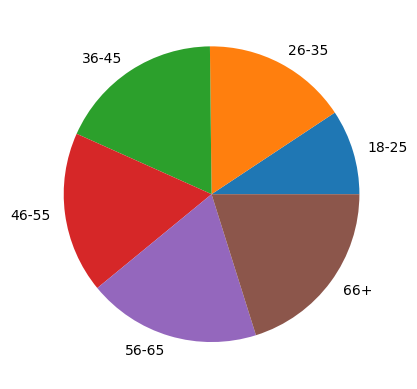

In [10]:
gr = df14.groupby(['id_w', 'age_cat']).count()['X'].reset_index()
plt.pie(gr[gr['id_w'] == 2022]['X'], labels=gr[gr['id_w'] == 2022]['age_cat'].unique())

Тест Манна-Уитни для двух "крайних" возрастных групп

In [11]:
mannwhitneyu(df4[df4['age_cat'] == "18-25"]['fingram'], df5[df5['age_cat'] == "18-25"]['fingram'])

MannwhitneyuResult(statistic=531221.0, pvalue=0.7214357137394702)

In [12]:
mannwhitneyu(df4[df4['age_cat'] == "66+"]['fingram'], df5[df5['age_cat'] == "66+"]['fingram'])

MannwhitneyuResult(statistic=2876389.5, pvalue=0.002800544134112968)

Изучаем динамику по годам

<Axes: xlabel='id_w', ylabel='fingram'>

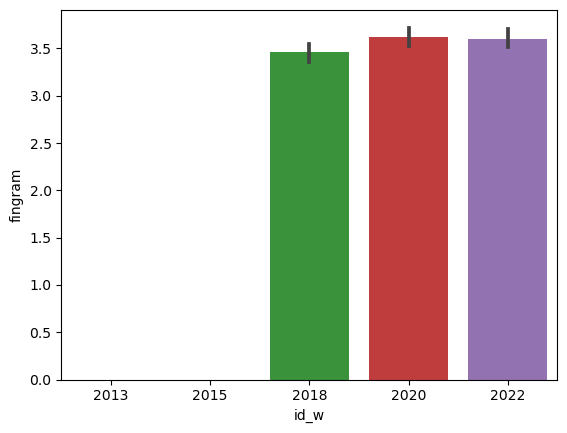

In [13]:
sns.barplot(df14[df14['age_cat'] == "18-25"], x='id_w', y='fingram')

<Axes: xlabel='id_w', ylabel='fingram'>

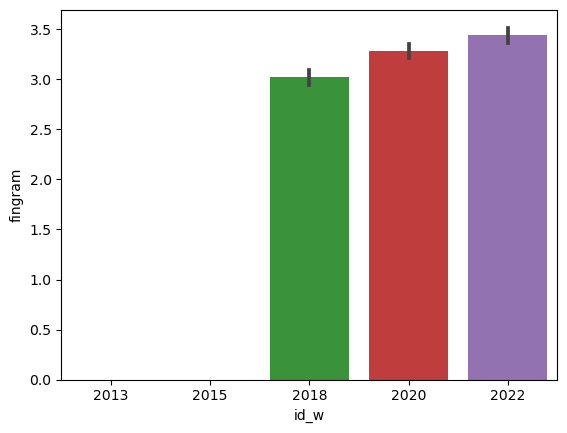

In [14]:
sns.barplot(df14[df14['age_cat'] == "66+"], x='id_w', y='fingram')

Отбираем только тех, кто принял участие в трех последних волнах опроса

In [15]:
gr_id = df14[df14['id_w'] >= 2018].groupby(['idind'])

In [16]:
fingramw = gr_id[['age', 'age_cat', 'q1', 'q2', 'q5', 'q6', 'q7', 'q8', 'fingram']].agg(list)

In [17]:
fingramw['len'] = fingramw['q1'].apply(lambda x: len(x))

In [18]:
ids = fingramw[fingramw['len'] == 3].reset_index()['idind']
repeat = df14[df14['idind'].isin(ids)]

<Axes: xlabel='id_w', ylabel='fingram'>

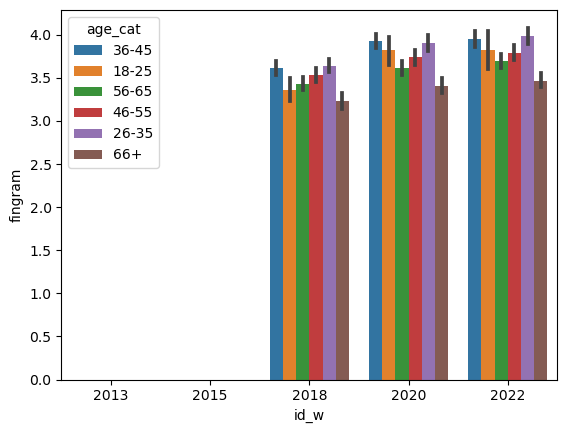

In [19]:
sns.barplot(repeat, x='id_w', y='fingram', hue='age_cat')

снова смотрим динамику по годам

<Axes: xlabel='id_w', ylabel='fingram'>

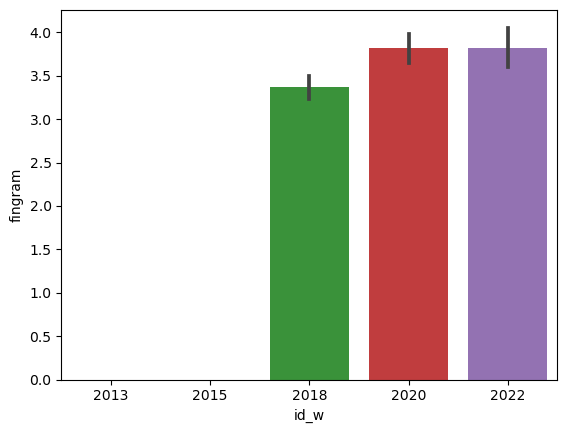

In [21]:
sns.barplot(repeat[repeat['age_cat'] == "18-25"], x='id_w', y='fingram')

<Axes: xlabel='id_w', ylabel='fingram'>

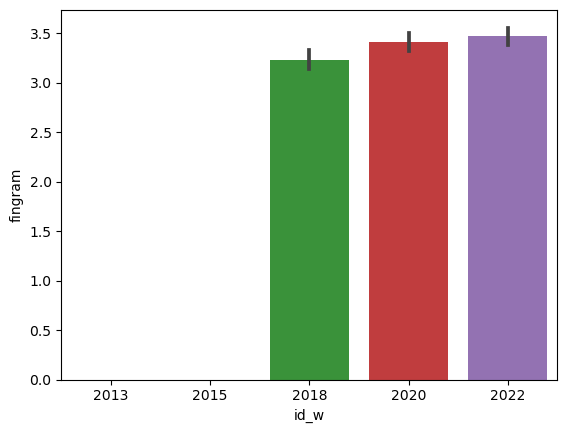

In [22]:
sns.barplot(repeat[repeat['age_cat'] == "66+"], x='id_w', y='fingram')

Количество людей, которые приняли участие в трех последних волнах опроса

In [23]:
repeat.groupby(['id_w', 'age_cat']).count()['X']

id_w  age_cat
2013  18-25       631
      26-35       950
      36-45      1190
      46-55      1447
      56-65      1153
      66+         568
2015  18-25       577
      26-35      1152
      36-45      1258
      46-55      1418
      56-65      1402
      66+         824
2018  18-25       518
      26-35      1383
      36-45      1345
      46-55      1560
      56-65      1698
      66+        1357
2020  18-25       359
      26-35      1244
      36-45      1364
      46-55      1514
      56-65      1769
      66+        1611
2022  18-25       219
      26-35      1115
      36-45      1361
      46-55      1494
      56-65      1766
      66+        1906
Name: X, dtype: int64

Выводы согласно исследованию:
1. Помимо пенсионеров (66+) молодежь (18-25) также обладает низким уровнем финансовой грамотности, данная закономерность соблюдается во всех годах исследования (2018, 2020, 2022)
2. Динамика по годам: финансовая грамотность пенсионеров непрерывно растет, в то время как финансовая грамонтость молодежи в 2022 году не выросла по сравнению с предыдущей волной

Почему не использовали:
1. Индекс финансовой граомтности отличается от принятого нами
2. Количество молодых людей, принявших участие в опросе, значительно ниже, чем пожилых людей